# Урок 3
## Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Задача 1

#### Даны значения зарплат из выборки выпускников: 

#### 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

#### Своими руками (т.е. без использования статистических функций вроде mean, std, var) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

#### Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [2]:
sample = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])
mean = sample.sum()/sample.size
var = ((sample-mean)**2).sum()/sample.size
rvar = ((sample-mean)**2).sum()/(sample.size-1)
std = np.sqrt(var)
rstd = np.sqrt(rvar)

print('Расчет на бамажке:')
print('Среднее арифметическое:', np.round(mean,2))
print('Смещенная дисперсия:', np.round(var,2))
print('Несмещенная дисперсия:', np.round(rvar,2))
print('Std по выборочной дисперсии:', np.round(std,2))
print('Std по несмещенной дисперсии:', np.round(rstd,2))

Расчет на бамажке:
Среднее арифметическое: 73.14
Смещенная дисперсия: 2135.07
Несмещенная дисперсия: 2241.83
Std по выборочной дисперсии: 46.21
Std по несмещенной дисперсии: 47.35


### Задача 2

#### Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot.

#### В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

In [3]:
sort_sample = np.sort(sample)
sort_sample

array([ 17,  24,  25,  30,  33,  45,  55,  57,  65,  65,  70,  75,  75,
        77,  80,  84,  89,  90, 100, 150, 230])

In [4]:
print('Mедиана:', sort_sample[sample.size//2])
q1 = sort_sample[sample.size//4]
q3 = sort_sample[sample.size*3//4]
interq = q3-q1
print('1 квартиль:', q1)
print('3 квартиль:', q3)
print('Интерквартильный размах:', interq)

Mедиана: 70
1 квартиль: 45
3 квартиль: 84
Интерквартильный размах: 39


In [5]:
boxplot_range = (q1 - 1.5 * interq, q3 + 1.5 * interq)
print('Усы boxplot:', boxplot_range)

Усы boxplot: (-13.5, 142.5)


In [6]:
outliers = []
for i in sort_sample:
    if i < boxplot_range[0] or i > boxplot_range[1]:
        outliers.append(i)

print('Bыбросы:', outliers)

Bыбросы: [150, 230]


{'whiskers': [<matplotlib.lines.Line2D at 0x214085d4860>,
 'caps': [<matplotlib.lines.Line2D at 0x214085d4ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x214085d4400>],
 'medians': [<matplotlib.lines.Line2D at 0x214085ea5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x214085ea908>],
 'means': []}

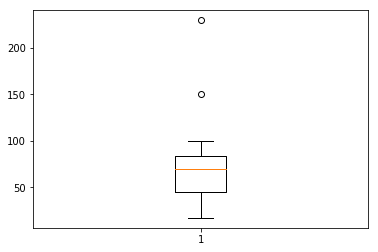

In [7]:
plt.boxplot(sort_sample)

### Задача 3

#### В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

#### Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Используем для решения задачи формулу Байеса.

Определимся что событие $A$ - это сданная сессия. Событие $B_i$ что сдал студент с i-го факультета. Нам надо найти $P(B_i|A)$. По формуле Байеса получаем $P(B_i|A) = \dfrac{P(A|B_i) \cdot P(B_i)}{P(A)}$

Определим вероятность что сессию сдал студент i-го факультета. Т.к. студентов на факультете C в 2 раза больше чем на факультетах A и B, $P(B_A) = P(B_B) = \dfrac{1}{4}$, $P(B_C) = \dfrac{1}{2}$
Вероятности $P(A|B_i)$ нам даны: $P(A|B_A) = 0.8$, $P(A|B_B) = 0.7$, $P(A|B_A) = 0.9$.
Осталось посчитать вероятность сдачи сессии студентами всех факультетов. Воспользуемся формулой полной вероятности.

$$P(A) = P(A|B_A) \cdot P(B_A) + P(A|B_B) \cdot P(B_B) + P(A|B_C) \cdot P(B_C).$$

$$P(A) = 0.8 \cdot \dfrac{1}{4} + 0.7 \cdot \dfrac{1}{4} + 0.9 \cdot \dfrac{1}{2}.$$

In [8]:
p_student = [0.25, 0.25, 0.5]
p_student_done = [0.8, 0.7, 0.9]

P_A = p_student_done[0] * p_student[0] + p_student_done[1] * p_student[1] + p_student_done[2] * p_student[2]
print('Bероятность сдачи сессии студентами всех факультетов:',P_A)

Bероятность сдачи сессии студентами всех факультетов: 0.825


Теперь можем посчитать искомые вероятности подставляя значения в формулу.

In [9]:
def bayes(P_A_B, P_B, P_A):
    return (P_A_B * P_B) / P_A

student_a = bayes(p_student_done[0], p_student[0], P_A)
student_b = bayes(p_student_done[1], p_student[1], P_A)
student_c = bayes(p_student_done[2], p_student[2], P_A)
print('Вероятность, что успешный скубент с факультета A:', np.round(student_a,2))
print('Вероятность, что успешный скубент с факультета B:', np.round(student_b,2))
print('Вероятность, что успешный скубент с факультета C:', np.round(student_c,2))

Вероятность, что успешный скубент с факультета A: 0.24
Вероятность, что успешный скубент с факультета B: 0.21
Вероятность, что успешный скубент с факультета C: 0.55


Проверим:

In [10]:
student_a + student_b + student_c

1.0